# Trying to simulate a particle moving with constant velocity
I will append each step to some dataset and figure out a way to display it with matplotlib

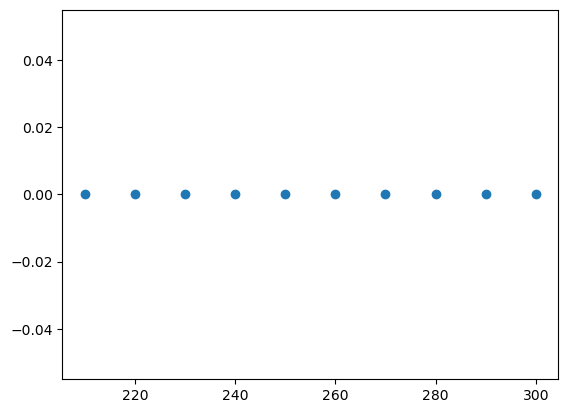

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Initial conditions
position = np.array([300, 0])
velocity = np.array([-10, 0])

## Simulating parameters
starttime = 0
dt = 1
totaltime = 10

simulation = np.array([position + velocity*d for d in range(starttime, totaltime, dt)])

plt.scatter(np.transpose(simulation)[0], np.transpose(simulation)[1])
plt.show()


# Trying to add accelleration

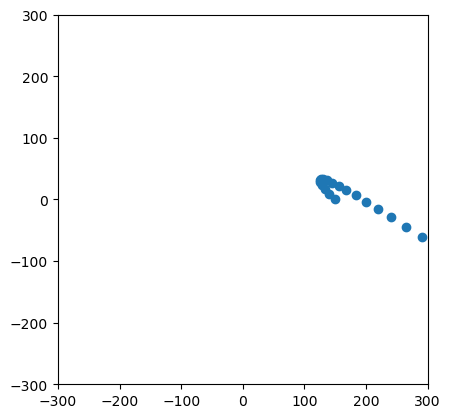

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Initial conditions
position     = np.array([150, 0])
velocity     = np.array([-10, 10])
acceleration = np.array([2, -1.5])

## Simulating parameters
starttime = 0
dt = 1
endtime = 20
totaltime = endtime - starttime

simulation = np.array([position + velocity*d + 0.5*acceleration*d**2 for d in np.linspace(starttime, totaltime, int(totaltime//dt))])


fig, ax = plt.subplots()
ax.scatter(np.transpose(simulation)[0], np.transpose(simulation)[1])
ax.set_aspect('equal')
ax.set_ylim((-300, 300))
ax.set_xlim((-300, 300))
plt.show()

### How to make another particle interact?

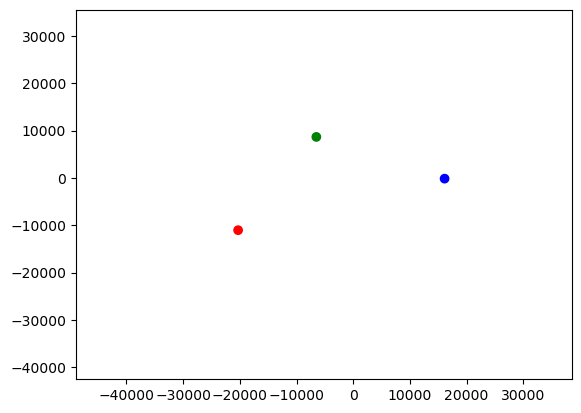

In [5]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as anim

## Initial conditions
class particle(object):
    def __init__(self, xpos, ypos, xvel, yvel, xacc, yacc, mass):
        self.xpos = xpos
        self.ypos = ypos
        self.xvel = xvel
        self.yvel = yvel
        self.xacc = xacc
        self.yacc = yacc
        self.mass = mass

    def step(self, dt=1, gravconst=6.67e-11, others=[]):
        others = np.array(others).astype(particle)
        xgravforce = 0
        ygravforce = 0
        for part in others:
            distancevec = [self.xpos - part.xpos, self.ypos - part.ypos]
            distancemag = np.sqrt(distancevec[0]**2+distancevec[1]**2)
            xgravforce += -distancevec[0]*gravconst*self.mass*part.mass/distancemag**3
            ygravforce += -distancevec[1]*gravconst*self.mass*part.mass/distancemag**3
        self.xacc = xgravforce/self.mass
        self.yacc = ygravforce/self.mass
        self.xvel += 0.5*self.xacc*dt**2
        self.yvel += 0.5*self.yacc*dt**2
        self.xpos += 0.5*self.xvel*dt**2
        self.ypos += 0.5*self.yvel*dt**2


one = particle(1e4, 0, 0, 18e2, 0, 0, 5e20)
two = particle(1e4*np.cos(2*np.pi/3), 1e4*np.sin(2*np.pi/3), -18e2*np.sin(2*np.pi/3), 18e2*np.cos(2*np.pi/3), 0, 0, 5e20)
three = particle(1e4*np.cos(4*np.pi/3), 1e4*np.sin(4*np.pi/3), -18e2*np.sin(4*np.pi/3), 18e2*np.cos(4*np.pi/3), 0, 0, 5e20)

## Simulation parameters
start = 0
stop = 400
totaltime = stop - start
delt = 1
gconst = 6.67e-11

# Simulaiton routine
simulation1, simulation2, simulation3 = [], [], []
for i in range(int(totaltime//delt)):
    simulation1.append([one.xpos, one.ypos])
    simulation2.append([two.xpos, two.ypos])
    simulation3.append([three.xpos, three.ypos])
    one.step(gravconst=gconst, dt=delt, others=[two, three])
    two.step(gravconst=gconst, dt=delt, others=[three, one])
    three.step(gravconst=gconst, dt=delt, others=[one, two])

simulation1 = np.array(simulation1).astype(float)
simulation2 = np.array(simulation2).astype(float)
simulation3 = np.array(simulation3).astype(float)

fig, ax = plt.subplots()
# ax.scatter(np.transpose(simulation1)[0], np.transpose(simulation1)[1], label='particle1').findobj
# ax.scatter(np.transpose(simulation2)[0], np.transpose(simulation2)[1], label='particle2')
# ax.scatter(np.transpose(simulation3)[0], np.transpose(simulation3)[1], label='particle3')

artists = []
colors = ['red', 'green', 'blue']
for i in range(int(totaltime//delt)):
    container = ax.scatter([simulation1[i][0], simulation2[i][0], simulation3[i][0]], [simulation1[i][1], simulation2[i][1], simulation3[i][1]], color=colors)
    artists.append(container.findobj())

ani = anim.ArtistAnimation(fig=fig, artists=artists)
writer = anim.writers['ffmpeg'](fps=30)
ani.save("gravitysimulation.mp4", writer=writer, dpi=200)
plt.show()

## It kinda works
In order to get something to work I updated the position of each particle one by one, and the next step depends on that particle's new position\
The more correct way to do this would to step each particle at the same time

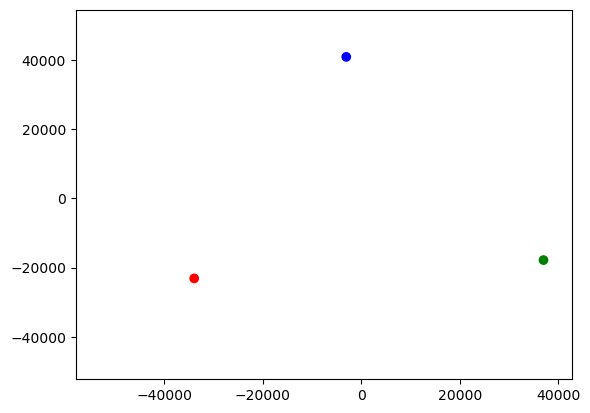

In [8]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as anim

## Initial conditions
class particle(object):
    def __init__(self, xpos, ypos, xvel, yvel, mass):
        self.xpos = xpos
        self.ypos = ypos
        self.xvel = xvel
        self.yvel = yvel
        self.xacc = 0
        self.yacc = 0
        self.xfor = 0
        self.yfor = 0
        self.mass = mass

    def updatenetfor(self, others=[], gravconst=6.67e-11):
        others = np.array(others).astype(particle)
        self.xfor = 0
        self.yfor = 0
        for part in others:
            distancevec = [self.xpos - part.xpos, self.ypos - part.ypos]
            distancemag = np.sqrt(distancevec[0]**2+distancevec[1]**2)
            self.xfor += -distancevec[0]*gravconst*self.mass*part.mass/distancemag**3
            self.yfor += -distancevec[1]*gravconst*self.mass*part.mass/distancemag**3

    def step(self, dt=1):
        self.xacc = self.xfor/self.mass
        self.yacc = self.yfor/self.mass
        self.xvel += 0.5*self.xacc*dt**2
        self.yvel += 0.5*self.yacc*dt**2
        self.xpos += 0.5*self.xvel*dt**2
        self.ypos += 0.5*self.yvel*dt**2


one = particle(1e4, 0, 0, 18e2, 5e20)
two = particle(1e4*np.cos(2*np.pi/3), 1e4*np.sin(2*np.pi/3), -18e2*np.sin(2*np.pi/3), 18e2*np.cos(2*np.pi/3), 5e20)
three = particle(1e4*np.cos(4*np.pi/3), 1e4*np.sin(4*np.pi/3), -18e2*np.sin(4*np.pi/3), 18e2*np.cos(4*np.pi/3), 5e20)

## Simulation parameters
start = 0
stop = 400
totaltime = stop - start
delt = 1
gconst = 6.67e-11

# Simulaiton routine
simulation1, simulation2, simulation3 = [], [], []
for i in range(int(totaltime//delt)):
    simulation1.append([one.xpos, one.ypos])
    simulation2.append([two.xpos, two.ypos])
    simulation3.append([three.xpos, three.ypos])
    one.updatenetfor(others=[two, three])
    two.updatenetfor(others=[three, one])
    three.updatenetfor(others=[one, two])
    one.step(dt=delt)
    two.step(dt=delt)
    three.step(dt=delt)

simulation1 = np.array(simulation1).astype(float)
simulation2 = np.array(simulation2).astype(float)
simulation3 = np.array(simulation3).astype(float)

fig, ax = plt.subplots()
# ax.scatter(np.transpose(simulation1)[0], np.transpose(simulation1)[1], label='particle1').findobj
# ax.scatter(np.transpose(simulation2)[0], np.transpose(simulation2)[1], label='particle2')
# ax.scatter(np.transpose(simulation3)[0], np.transpose(simulation3)[1], label='particle3')

artists = []
colors = ['red', 'green', 'blue']
for i in range(int(totaltime//delt)):
    container = ax.scatter([simulation1[i][0], simulation2[i][0], simulation3[i][0]], [simulation1[i][1], simulation2[i][1], simulation3[i][1]], color=colors)
    artists.append(container.findobj())

ani = anim.ArtistAnimation(fig=fig, artists=artists)
writer = anim.writers['ffmpeg'](fps=30)
ani.save("gravitysimulationbetter.mp4", writer=writer, dpi=200)
plt.show()